### Introduction

######    Scientific Question: Can Iris Flower Species be recognised based on its physical features like sepal lenth, width and petal length? 

    Iris is a genus of 260–300. species of flowering plants with showy flowers. It takes its name from the Greek word for a rainbow, which is also the name for the Greek goddess of the rainbow, Iris. Some authors state that the name refers to the wide variety of flower colors found among the many species.
    The use of this data set in cluster analysis however is not common, since the data set only contains two clusters with rather obvious separation. One of the clusters contains Iris setosa, while the other cluster contains both Iris virginica and Iris versicolor and is not separable without the species information Fisher used. 

######    Dataset: IRIS (UCI-ML Repository)
    
    Data Set Information:

    This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

    Target VAriable: species (3 Categories)
    -- Iris Setosa
    -- Iris Versicolour
    -- Iris Virginica
    
    Features:
    1. sepal length in cm
    2. sepal width in cm
    3. petal length in cm
    4. petal width in cm
    
    Algorithms to be used: 
    1. KNN
    2. Decision Trees
    
###### Hypothesis: IF comparitive primary dimensions (petal/sepal - length and width) are larger of a species THEN it Iris Virginica, ELSE it is Iris Versicolour or Setosa

    To answer the scintific question and test my hypothesis, several plots and statistical tools have been used. Later machine learning models were trained and tested using different techniques like correlatio matrix and confusion matrix, to find the relation ship between target variable and various features.

In [1]:
# importing required libraries
import numpy as np   # Handelling array, matrices and numbers
import pandas as pd # Handling dataframes and importing files
import seaborn as sns  #Visualization Purpose, plots and all
sns.set_palette('husl')
import matplotlib.pyplot as plt   #Visualization Purpose, plots and all
%matplotlib inline

from sklearn import metrics #SKlearn is a Machine learning tool, contain diff. usefull function, Metric is for error calculation
from sklearn.neighbors import KNeighborsClassifier  #Model KNN
from sklearn.tree import DecisionTreeClassifier #Model Decision Trees
from sklearn.model_selection import cross_val_score  # Evaluating Model
from sklearn.model_selection import train_test_split  #Splitting data in test and train


In [2]:
# Loading data
data = pd.read_csv('iris_dataset_2.csv')

In [3]:
# Top 10 rows of data
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# Statistical details of data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualisation

### Pair Plot: 

    A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value, like this: Pairs plots are just elaborations on this, showing all variables paired with all the other variables.

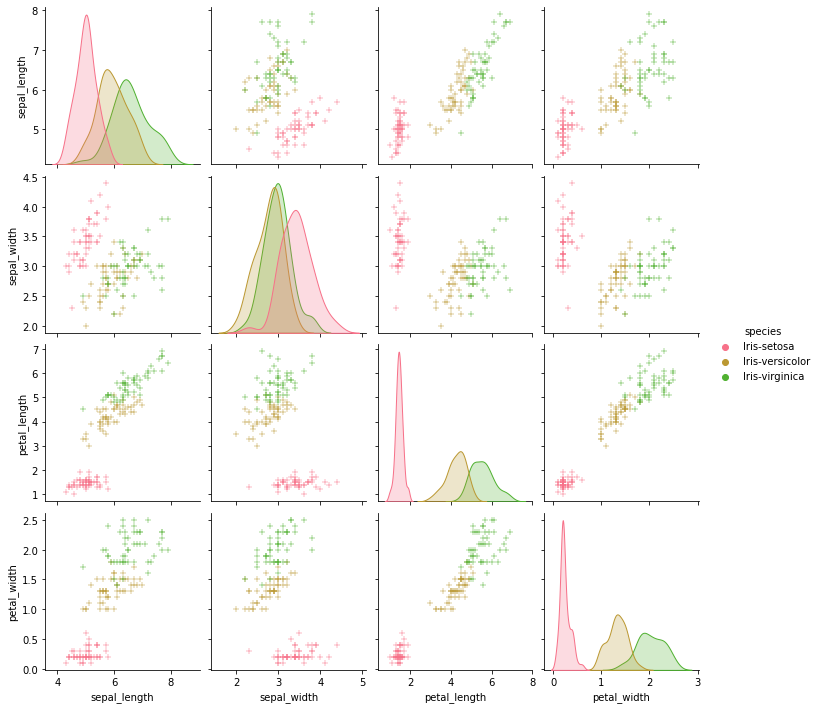

In [6]:
import warnings
warnings.filterwarnings('ignore')
g = sns.pairplot(data, hue='species', markers='+')
plt.show()

### Bar Plot : 

    Here the frequency of the observation is plotted.In this case we are plotting the frequency of the three species in the Iris Dataset

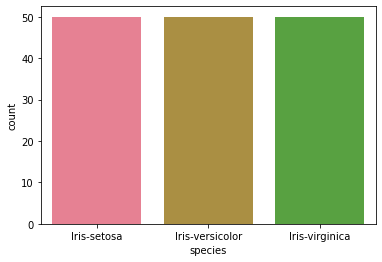

In [7]:
sns.countplot('species',data=data)
plt.show()

### Heat map 

    Heat map is used to find out the correlation between different features in the dataset.High positive or negative           value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

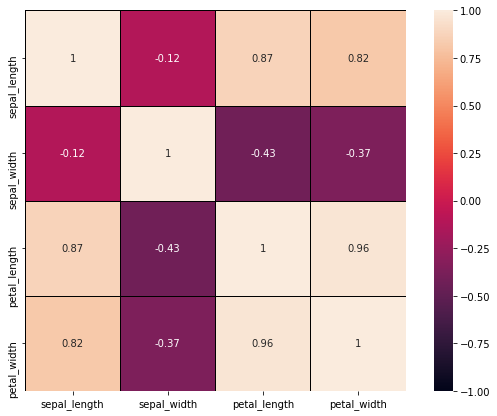

In [8]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

### Modelling with Sci-Kit Learn

In [9]:
X = data.drop(['species'], axis=1)
y = data['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


### 1. KNN

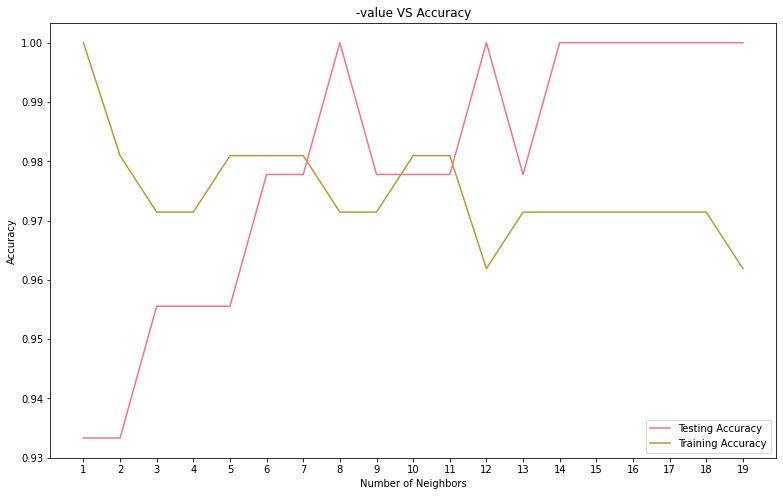

Best accuracy is 1.0 with K = 8


In [11]:
neig = np.arange(1,20)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [12]:
knn = KNeighborsClassifier(n_neighbors=8, p=2, metric='minkowski')
knn.fit(X_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, y_test)))


The accuracy of the knn classifier is 0.97 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


### Confusion Matrix

<AxesSubplot:>

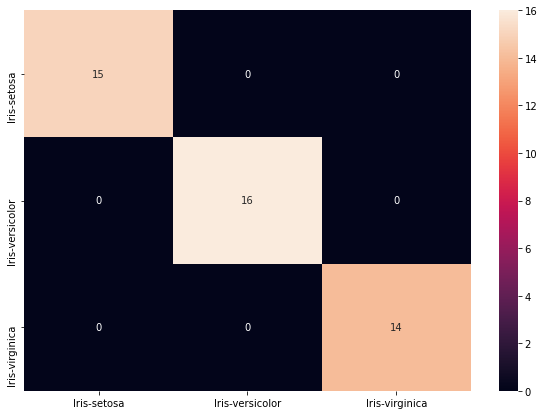

In [13]:
cm=metrics.confusion_matrix(y_test,knn.predict(X_test))
# print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ['Iris-setosa' , 'Iris-versicolor', 'Iris-virginica']],
                  columns = [i for i in ['Iris-setosa' , 'Iris-versicolor', 'Iris-virginica'] ])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

### 2. Decision Trees

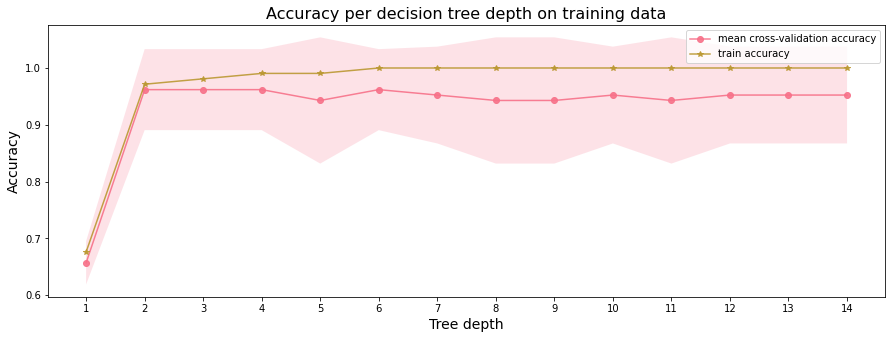

In [14]:



# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


    

In [15]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-2 tree achieves the best mean cross-validation accuracy 96.19048 +/- 3.56348% on training dataset


In [16]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test, model
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test, model = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  2
Accuracy, Training Set:  97.14286 %
Accuracy, Test Set:  93.33333 %


### Confusion Matrix

<AxesSubplot:>

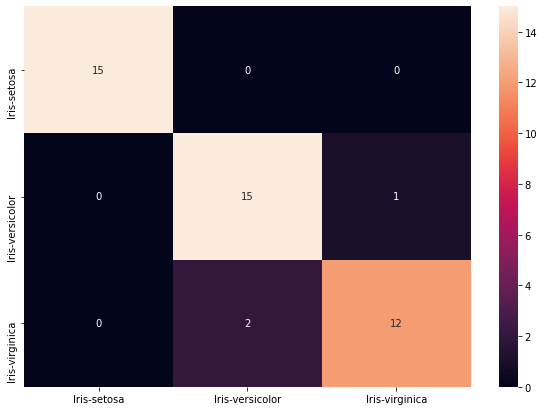

In [17]:

cm=metrics.confusion_matrix(y_test,model.predict(X_test))
# print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ['Iris-setosa' , 'Iris-versicolor', 'Iris-virginica']],
                  columns = [i for i in ['Iris-setosa' , 'Iris-versicolor', 'Iris-virginica'] ])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

### Discussion

#### Model Used
KNN

    In statistics, the k-nearest neighbors algorithm is a non-parametric classification method first developed by Evelyn Fix and Joseph Hodges in 1951, and later expanded by Thomas Cover. It is used for classification and regression. In both cases, the input consists of the k closest training examples in data set.
    
Decision Trees

    The decision tree Algorithm belongs to the family of supervised machine learning algorithms. It can be used for both a classification problem as well as for regression problem.

#### Following things can be observed

    -- KNN performs better than Decision Tree
    -- Random Forest might performs better as compare to DT
    -- Further Hyperparameter tuning might increase the accuracy
    -- Addition in features will further increase the accuracy, model might get more details and can identify more complex        feature
#### Scientific Answer and Hypothesis results

    -- It is clear from the data and accuracy we are getting that the given data is sufficient to classify the Iros flower species.
    -- Also, from the pairplot we can see that, larger dimention tend to represent Iris Virginica, however the data is close to distinguish but the models trained are performing well.